# Business Problem

> High customer churn is reducing profitability. This analysis aims to identify key churn drivers and help the business retain valuable customers.

    

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/churn.csv")

In [3]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['customerID'].duplicated().sum() #check for any unique as well

np.int64(0)

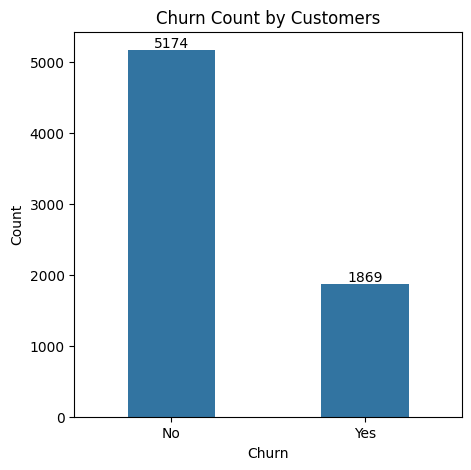

In [12]:
plt.figure(figsize=(5,5))
plt.title("Churn Count by Customers")
plt.xlabel("Churn")
plt.ylabel("Count")

ax = sns.countplot(x = "Churn", data = df, width= 0.5, gap= 0.1)
ax.bar_label(ax.containers[0])

plt.show()

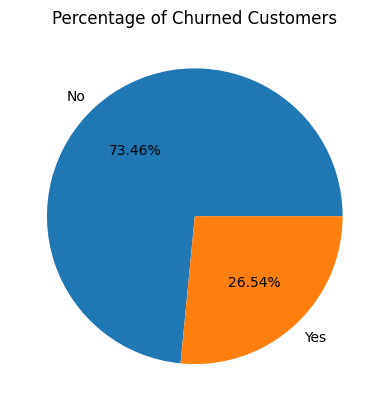

In [13]:
df_churn = df.groupby('Churn').agg({'Churn' : 'count'})

plt.title("Percentage of Churned Customers")
plt.pie(df_churn['Churn'], labels= df_churn.index, autopct= "%1.2f%%")
plt.show()

> **26.54%** of customers have churned-out.

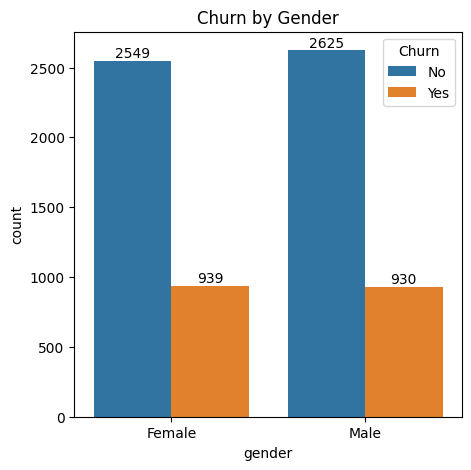

In [14]:
plt.figure(figsize = (5,5))
plt.title("Churn by Gender")

ax = sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

> **No** significant gender-based difference in customer attrition.

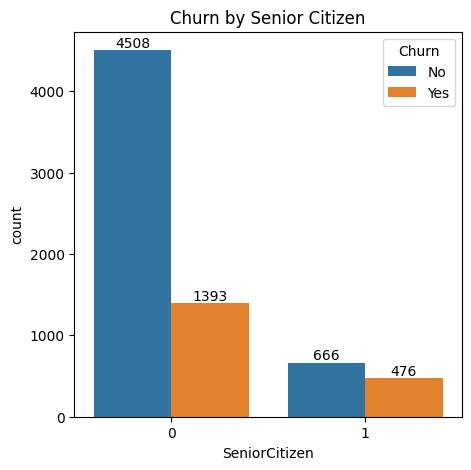

In [15]:
plt.figure(figsize = (5,5))
plt.title("Churn by Senior Citizen")

ax = sns.countplot(x = "SeniorCitizen", data = df, hue= "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

There is **high-percentage** of churning in **Senior Citizen**, as compared to others.

In [16]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

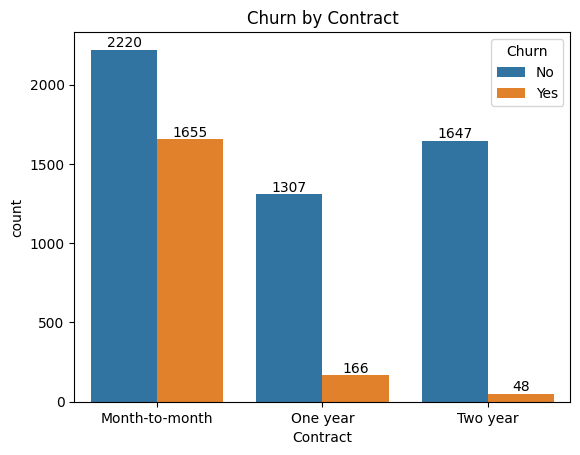

In [17]:
ax = sns.countplot(data = df, x = "Contract", hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Churn by Contract")

plt.show()

> **Month-to-month** Contract-basis customers are more likely to leave.

In [18]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

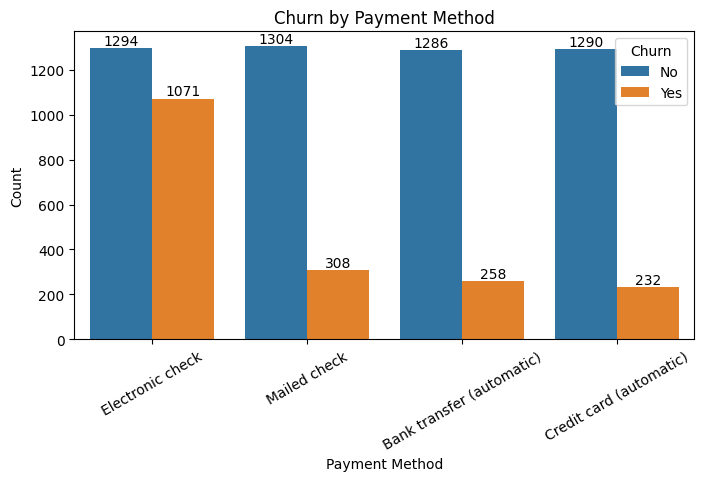

In [32]:
plt.figure(figsize=(8,4))

ax = sns.countplot(data = df, x = "PaymentMethod", hue = "Churn", width= 0.8 )
plt.xticks(rotation = 30)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Churn by Payment Method")

plt.show()

> "Electronic check" has the **highest churn**, around 50%, while other payment methods show much lower churn rates.

In [20]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

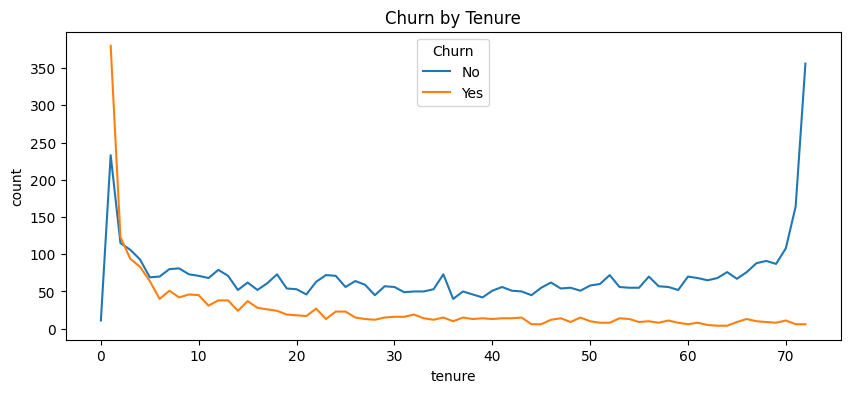

In [21]:
plt.figure(figsize=(10,4))

tenure_churn = df.groupby(['tenure', 'Churn']).size().reset_index(name='count')

sns.lineplot(data=tenure_churn, x='tenure', y='count', hue='Churn')

plt.title("Churn by Tenure")

plt.show()

> **Initial stages** of tenure has a high churn rate.

In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

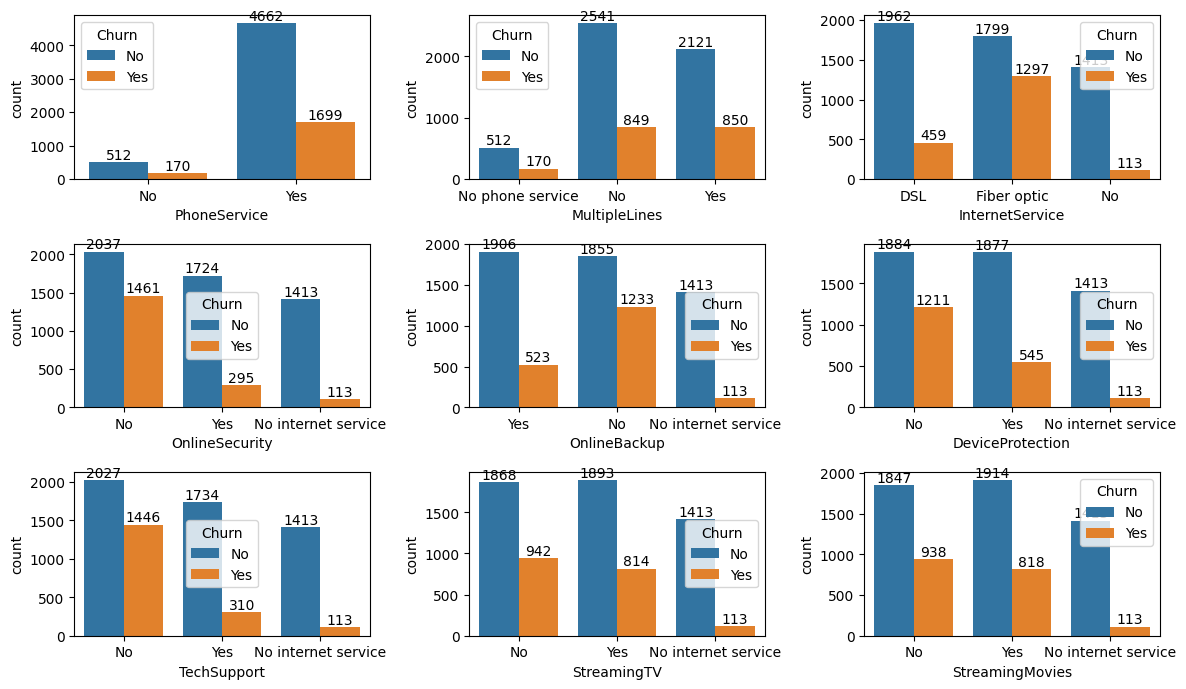

In [23]:
plt.figure(figsize=(12,7))

plt.subplot(3, 3, 1)
ax1 = sns.countplot(data=df, x='PhoneService', hue='Churn')
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])

plt.subplot(3, 3, 2)
ax2 = sns.countplot(data=df, x='MultipleLines', hue='Churn')
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])

plt.subplot(3, 3, 3)
ax3 = sns.countplot(data=df, x='InternetService', hue='Churn')
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])

plt.subplot(3, 3, 4)
ax4 = sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
ax4.bar_label(ax4.containers[0])
ax4.bar_label(ax4.containers[1])

plt.subplot(3, 3, 5)
ax5 = sns.countplot(data=df, x='OnlineBackup', hue='Churn')
ax5.bar_label(ax5.containers[0])
ax5.bar_label(ax5.containers[1])

plt.subplot(3, 3, 6)
ax6 = sns.countplot(data=df, x='DeviceProtection', hue='Churn')
ax6.bar_label(ax6.containers[0])
ax6.bar_label(ax6.containers[1])

plt.subplot(3, 3, 7)
ax7 = sns.countplot(data=df, x='TechSupport', hue='Churn')
ax7.bar_label(ax7.containers[0])
ax7.bar_label(ax7.containers[1])

plt.subplot(3, 3, 8)
ax8 = sns.countplot(data=df, x='StreamingTV', hue='Churn')
ax8.bar_label(ax8.containers[0])
ax8.bar_label(ax8.containers[1])

plt.subplot(3, 3, 9)
ax9 = sns.countplot(data=df, x='StreamingMovies', hue='Churn')
ax9.bar_label(ax9.containers[0])
ax9.bar_label(ax9.containers[1])

plt.tight_layout()
plt.show()


> Customers using **Internet Service ( Fiber optic )** and those **without services like OnlineSecurity, OnlineBackup, or TechSupport** show the highest churn rates, making them key churn drivers. Additionally, users of **streaming services** tend to churn more, possibly due to value or experience issues.

> Also, Customers with **MultipleLines** don't show a significant difference in churn compared to those without, suggesting that **MultipleLines** is not a major factor influencing churn.



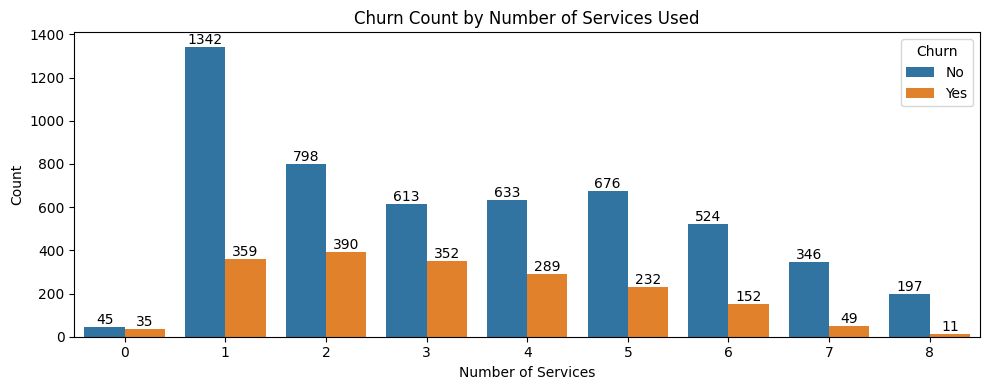

In [26]:
# Understanding Churn Based on Services Used

services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']

df['TotalServices'] = 0

for service in services:
    df['TotalServices'] += (df[service] == 'Yes').astype(int)

plt.figure(figsize=(10,4))
ax = sns.countplot(data=df, x='TotalServices', hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Churn Count by Number of Services Used")
plt.ylabel("Count")
plt.xlabel("Number of Services")
plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

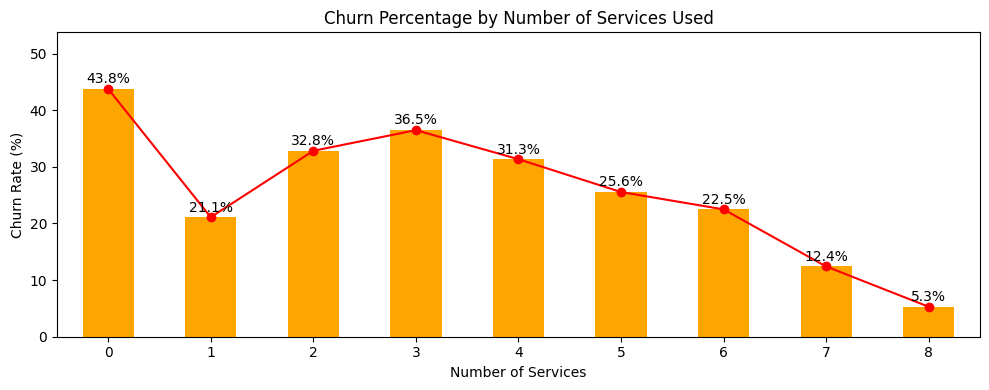

In [24]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']

df['TotalServices'] = 0
for service in services:
    df['TotalServices'] += (df[service] == 'Yes').astype(int)

churn_rate = df.groupby('TotalServices')['Churn'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(10,4))

plt.figure(figsize=(10,4))
ax = churn_rate['Yes'].plot(kind='bar', color='orange', label='Churn Rate (%)')
churn_rate['Yes'].plot(kind='line', marker='o', color='red', label='Trend', ax=ax)


for i, v in enumerate(churn_rate['Yes']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.title("Churn Percentage by Number of Services Used")
plt.xlabel("Number of Services")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, churn_rate['Yes'].max() + 10)
plt.tight_layout()

plt.show()

> Churn is **highest** for customers with **0, 2, or 3 services**, while those with **6–8 services** show **much lower churn**.

>Interestingly, customers with **exactly 1 service** have relatively low churn, possibly due to **clear expectations or simpler use cases**.


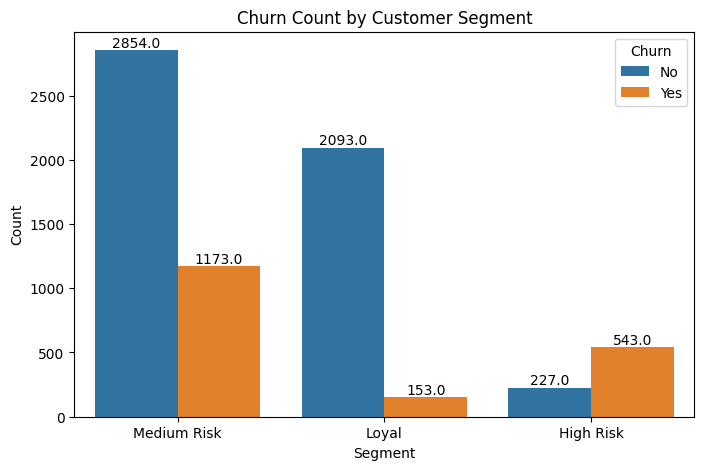

In [25]:
# Customer Risk Segmentation

df['Segment'] = 'Medium Risk'

df.loc[
    (df['tenure'] < 12) &
    (df['Contract'] == 'Month-to-month') &
    (df['MonthlyCharges'] > df['MonthlyCharges'].median()),
    'Segment'
] = 'High Risk'

df.loc[
    (df['tenure'] >= 40) &
    (df['Contract'] != 'Month-to-month'),
    'Segment'
] = 'Loyal'

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Segment', hue='Churn')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')
plt.title('Churn Count by Customer Segment')
plt.ylabel('Count')
plt.show()

> - Prioritize **Medium Risk** customers to prevent churn and take immediate action on **High Risk** group where churn already dominates;
- **Loyal** customers show strong retention and need simple engagement.

# 🔍 Key **Recommendations** to Reduce Customer Churn

* **Target Senior Citizens** with better support, simplified plans, and loyalty rewards to build trust and reduce churn.

* **Encourage long-term contracts** by offering discounts, free services, or loyalty points to make them more attractive than month-to-month options.

* **Improve Fiber Optic service quality** by addressing speed, reliability, and customer complaints to increase satisfaction and retention.

* **Promote Online Security, Backup, and Tech Support** clearly during onboarding — highlight their benefits and offer them in bundles to improve customer stickiness.

* **Review Electronic Check payments** — consider simplifying the payment process or offering incentives to switch to more reliable methods like cards or auto-debit.

* **Engage new customers early** with welcome offers, onboarding support, and check-ins in the first few months to reduce early drop-offs.

* **Enhance streaming service value** by offering personalized content, free trials, or bundled plans to keep entertainment users engaged.

* **Prioritize Medium Risk customers** with targeted engagement, and take immediate action for **High Risk customers**, where churn already dominates.

* **Sustain loyalty among long-tenure customers** with simple check-ins or exclusive offers to keep them connected.

* **Upsell services to users with 0–3 services**, especially those with 2 or 3, who show high churn — offer bundles or personalized suggestions.

* **Preserve the 1-service segment** by keeping those offers simple, effective, and stable — this group shows unexpectedly low churn.